In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [2]:
df_clev = pd.read_csv('datasets/processed.cleveland.data', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                                                  'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ], na_values=['?'])

df_hung = pd.read_csv('datasets/processed.hungarian.data', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                                                  'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ], na_values=['?'])


df_swi = pd.read_csv('datasets/processed.switzerland.data', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach',
                                                                   'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ], na_values=['?'])

df_va = pd.read_csv('datasets/processed.cleveland.data', names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
                                                                'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target' ], na_values=['?'])


df = pd.concat([df_clev, df_hung, df_swi, df_va], ignore_index=True)

df_clev

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [3]:
df_clev.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,4
155,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1
98,52.0,1.0,2.0,134.0,201.0,0.0,0.0,158.0,0.0,0.8,1.0,1.0,3.0,0
148,45.0,1.0,2.0,128.0,308.0,0.0,2.0,170.0,0.0,0.0,1.0,0.0,3.0,0
184,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,0.0,3.0,1


In [4]:
df_clev.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [5]:
df_clev.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df_clev.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
na_cols = df_clev.columns[df_clev.isna().any()].tolist()

for col in na_cols:
    for age_bound in range(25, 85, 5):
        df_clev.loc[df_clev['age'].between(age_bound, age_bound+4.0), col] = df_clev.loc[df_clev['age'].between(age_bound, age_bound+4.0), col]\
                                                                     .fillna(df_clev[df_clev['age'].between(age_bound, age_bound+4.0)][col].mean())

In [8]:
df_clev.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df_clev.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [10]:
df_clev.loc[df_clev['target'] != 0.0, 'target']

1      2
2      1
6      3
8      2
9      1
      ..
297    1
298    1
299    2
300    3
301    1
Name: target, Length: 139, dtype: int64

In [11]:
#df.loc[df['target'] != 0.0, 'target'] = 1.0
df_clev.loc[df_clev['target'] != 0.0, 'target'] = 1.0

In [12]:
df_clev['sex'].value_counts()

1.0    206
0.0     97
Name: sex, dtype: int64

In [13]:
df_clev['cp'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

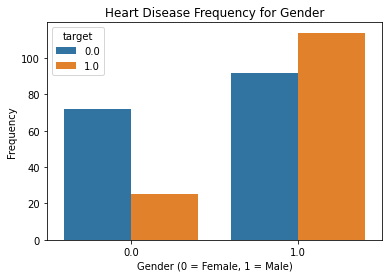

In [14]:
sns.countplot('sex', hue = 'target', data = df_clev)

plt.title('Heart Disease Frequency for Gender')
#plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()

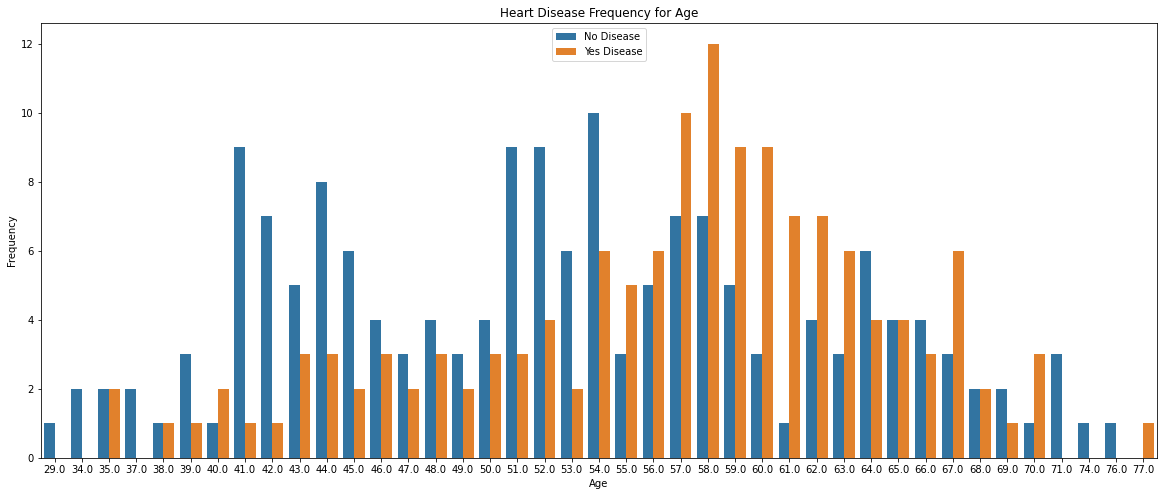

In [15]:
plt.figure(figsize=(20, 8))
sns.countplot('age', hue = 'target', data = df_clev)

plt.title('Heart Disease Frequency for Age')
plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

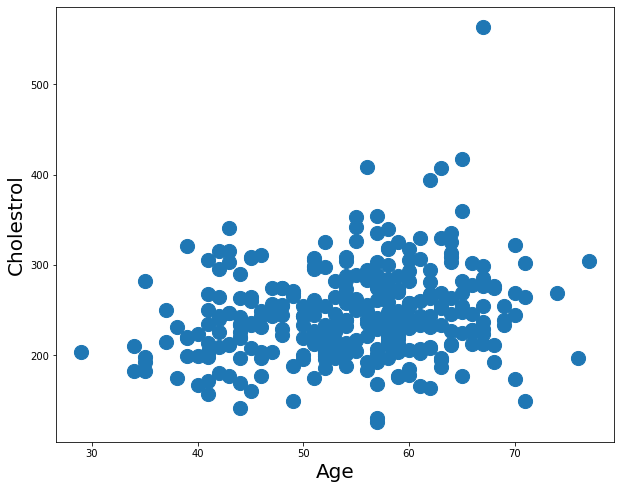

In [16]:
plt.figure(figsize=(10, 8))

plt.scatter(df_clev['age'], df_clev['chol'], s = 200)

plt.xlabel("Age", fontsize=20)
plt.ylabel("Cholestrol", fontsize=20)
plt.show()

In [17]:
features = df_clev.drop('target', axis = 1)

target = df_clev[['target']]

In [18]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0


In [19]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

categorical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
ca,303.0,0.668089,0.932465,0.0,0.0,0.0,1.0,3.0
slope,303.0,1.600660,0.616226,1.0,1.0,2.0,2.0,3.0
thal,303.0,4.733896,1.933276,3.0,3.0,3.0,7.0,7.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0


In [20]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


In [21]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,-1.465641e-18,1.001654,-2.819115,-0.713556,0.172994,0.727089,2.500191
trestbps,303.0,4.426236e-16,1.001654,-2.145037,-0.665300,-0.096170,0.472960,3.887739
chol,303.0,2.345026e-16,1.001654,-2.334877,-0.690503,-0.110136,0.547614,6.138485
thalach,303.0,-1.172513e-16,1.001654,-3.442067,-0.705307,0.148562,0.717808,2.294182
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [22]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1, sort=False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.948726,0.757525,-0.264900,0.017197,1.087338,1.0,1.0,0.0,1.0,0.0,3.0,6.0,2.0
1,1.392002,1.611220,0.760415,-1.821905,0.397182,1.0,0.0,1.0,4.0,3.0,2.0,3.0,2.0
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1.0,0.0,1.0,4.0,2.0,2.0,7.0,2.0
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,1.0,0.0,0.0,3.0,0.0,3.0,3.0,0.0
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [24]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.15,
                                                  random_state=10)

In [25]:
x_train.shape, x_val.shape, x_test.shape

((205, 13), (37, 13), (61, 13))

In [26]:
y_train.shape, y_val.shape, y_test.shape

((205, 1), (37, 1), (61, 1))

In [27]:
def build_model():

    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)

    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])

    return model

In [28]:
model = build_model()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


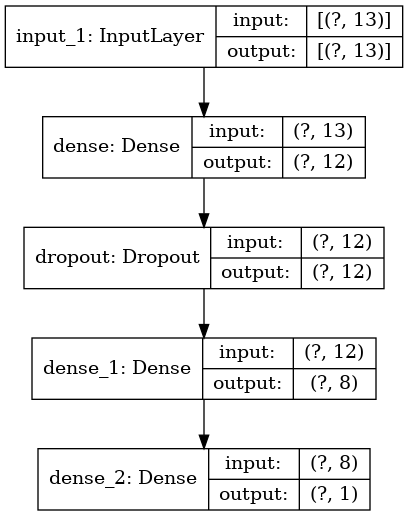

In [29]:
keras.utils.plot_model(model, show_shapes=True)

In [30]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.float64)>

In [31]:
num_epochs = 300

In [32]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [33]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

=============] - 0s 5ms/step - loss: 0.3075 - accuracy: 0.8683 - precision_1: 0.8646 - recall_1: 0.8557 - val_loss: 0.4093 - val_accuracy: 0.8649 - val_precision_1: 0.7778 - val_recall_1: 0.9333
Epoch 216/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3718 - accuracy: 0.8585 - precision_1: 0.8469 - recall_1: 0.8557 - val_loss: 0.4091 - val_accuracy: 0.8649 - val_precision_1: 0.7778 - val_recall_1: 0.9333
Epoch 217/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3302 - accuracy: 0.8634 - precision_1: 0.8632 - recall_1: 0.8454 - val_loss: 0.4138 - val_accuracy: 0.8649 - val_precision_1: 0.7778 - val_recall_1: 0.9333
Epoch 218/300
13/13 [==============================] - 0s 5ms/step - loss: 0.3202 - accuracy: 0.8732 - precision_1: 0.8660 - recall_1: 0.8660 - val_loss: 0.4155 - val_accuracy: 0.8649 - val_precision_1: 0.7778 - val_recall_1: 0.9333
Epoch 219/300
13/13 [==============================] - 0s 4ms/step - loss: 0.3505 - accuracy: 0.8488 - pre

In [34]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

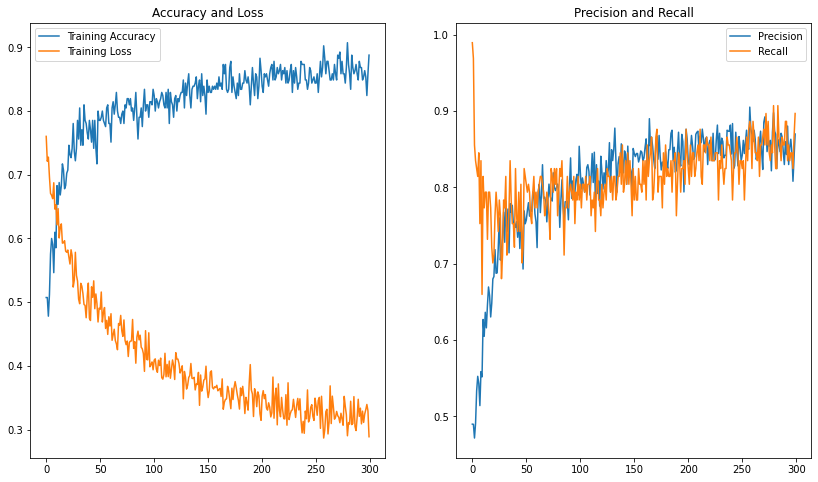

In [37]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_1']
recall = training_history.history['recall_1']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label ='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label ='Recall')

plt.title('Precision and Recall')
plt.legend()

In [38]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

2/2 [==============================] - 0s 2ms/step - loss: 0.7035 - accuracy: 0.7541 - precision_1: 0.7308 - recall_1: 0.7037


loss           0.703475
accuracy       0.754098
precision_1    0.730769
recall_1       0.703704
dtype: float64

In [39]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[5.6027085e-01],
       [5.2021170e-01],
       [1.0429004e-01],
       [9.1516584e-01],
       [1.3903192e-01],
       [5.7223439e-04],
       [9.1448456e-02],
       [8.6198556e-01],
       [9.7215116e-01],
       [9.4958836e-01]], dtype=float32)

In [40]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [41]:
y_pred[:10]

array([[1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [42]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [43]:
pred_results

,y_test,y_pred
0,0.0,1
1,0.0,1
2,0.0,0
3,1.0,1
4,1.0,0
...,...,...
56,0.0,0
57,0.0,0
58,1.0,0
59,0.0,1


In [44]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0.0,1.0
y_pred,,
0,27,8
1,7,19


In [46]:
accuracy_score(pred_results.y_pred, pred_results.y_test), precision_score(pred_results.y_pred, pred_results.y_test), recall_score(pred_results.y_pred, pred_results.y_test)

(0.7540983606557377, 0.7037037037037037, 0.7307692307692307)